### Bag of words

In [6]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

words={
    "You are so beautiful."
    "I am learning datascience course."
}

#Tokenize 
nltk.download('punkt')
tokenized_documents=[nltk.word_tokenize(doc.lower())for doc in words]


vocabulary= sorted(set([word for doc in tokenized_documents for word in doc]))
print(vocabulary)

['.', 'am', 'are', 'beautiful.i', 'course', 'datascience', 'learning', 'so', 'you']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
vectorizer= CountVectorizer(vocabulary=vocabulary)

#fit and transform the documents to create the bag of words model
x= vectorizer.fit_transform(words)

#convert the result to an array for better readability
bow_array= x.toarray()

print("bag_of_words: ", bow_array)
print("feature_names:",vectorizer.get_feature_names_out())

bag_of_words:  [[0 1 1 0 1 1 1 1 1]]
feature_names: ['.' 'am' 'are' 'beautiful.i' 'course' 'datascience' 'learning' 'so' 'you']


### TF-IDF

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

words= [
   "You are so beautiful."
   "I am learning datascience course."
]


vectorizer= TfidfVectorizer()
tfidf_vectors= vectorizer.fit_transform(words)

features= vectorizer.get_feature_names_out()
dense_tfidf_matrix= tfidf_vectors.todense()

data= pd.DataFrame(dense_tfidf_matrix, columns= features)
print(data)

         am       are  beautiful    course  datascience  learning        so  \
0  0.353553  0.353553   0.353553  0.353553     0.353553  0.353553  0.353553   

        you  
0  0.353553  


### Word Embedding

In [12]:
!pip install gensim

     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     ---------------------------------------- 59.0/59.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/60.3 kB ? eta -:--:--
   ---------------------------------------- 60.3/60.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.6/14.8 MB 11.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/14.8 MB 9.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.7/14.8 MB 12.0 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/14.8 MB 13.5 MB/s eta 0:00:01
   --------- ------------------------------ 3.7/1

In [38]:
import gensim
from gensim.models import word2vec
import nltk

In [42]:

#sample documents
words= [
    "You are so beautiful.",
   "I am learning datascience .",
    "I have completed my datascience course"
]

nltk.download('punkt')
tokenized_docs= [nltk.word_tokenize(d.lower()) for d in words]

model= word2vec.Word2Vec(sentences= tokenized_docs,vector_size=300,window=10,min_count=1,sg=0)

catvector= model.wv['datascience']
print("vector representation",catvector)

similarwords= model.wv.most_similar('datascience')
print("similar words",similarwords)
     

vector representation [-1.78742412e-04  7.88104517e-05  1.70111656e-03  3.00309109e-03
 -3.10098333e-03 -2.37226952e-03  2.15295749e-03  2.99099600e-03
 -1.67180935e-03 -1.25445728e-03  2.46016821e-03 -5.11157094e-04
 -1.51220441e-03  2.18468392e-03 -1.62005343e-03 -6.05339184e-04
  9.58859921e-04  3.30624578e-04 -2.76173837e-03 -3.14960605e-03
  2.43725535e-03  1.69008737e-03  2.25256453e-03  2.54288519e-04
  2.11696350e-03 -1.13512203e-03 -3.15467129e-04  1.92285771e-03
 -2.50721257e-03 -1.31203455e-03 -2.50386074e-03 -3.10014089e-04
  3.17937299e-03 -2.43972219e-03 -7.77922862e-04 -6.45913708e-04
  2.69247894e-03 -1.97696523e-03  1.50541464e-05 -1.58457796e-03
 -3.20118340e-03  1.66909769e-03 -2.91986181e-03 -1.46394176e-03
 -1.16999945e-05 -9.87271487e-05 -2.55374680e-03  3.20491428e-03
  1.66068599e-03  3.07771447e-03 -2.71930569e-03  1.49859942e-03
 -1.37902540e-03  2.74845370e-04  2.83287326e-03 -1.48739223e-03
  1.50583347e-03 -2.26232014e-03 -1.18282950e-03  3.13283596e-03
 -5

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Word Cloud

In [32]:
!pip install wordcloud matplotlib

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 445.2 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/300.2 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00


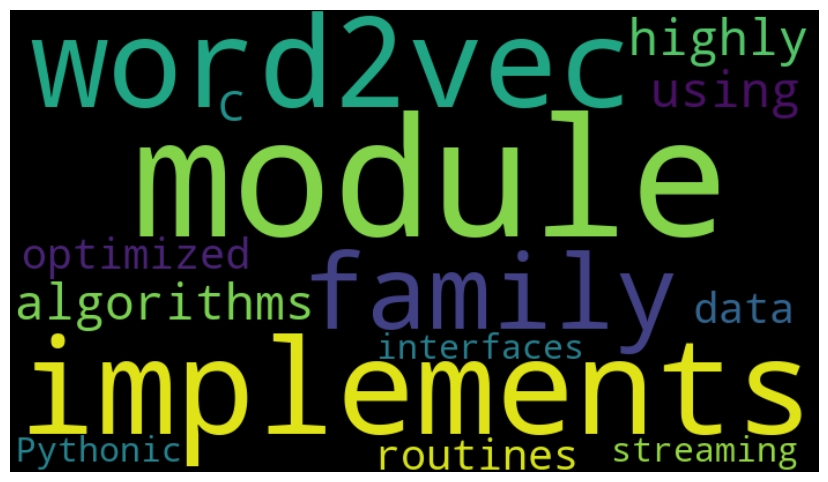

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text="""
This module implements the word2vec family of algorithms, using highly optimized C routines, data streaming and Pythonic interfaces.
"""
#define additional stopwords
stopwords= set(STOPWORDS)
stopwords.update(["the","of","and","is","to"])
#generate the wordcloud
wordcloud= WordCloud(stopwords=stopwords,background_color="Black",width=700,height=400).generate(text)

#plot the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation= "bilinear")
plt.axis("off")
plt.show()